# Phishing Domain Detection
## Feature Selection 02

[Dataset Link](https://data.mendeley.com/datasets/72ptz43s9v/1)<br>
[Dataset Description](https://www.sciencedirect.com/science/article/pii/S2352340920313202)

### 1. Testing models with 78 features

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

# Modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("data/78_features.csv")

In [3]:
df['phishing'].value_counts()

phishing
0    56706
1    30497
Name: count, dtype: int64

In [4]:
X = df.drop(columns=['phishing'])
X.head()

,qty_dot_domain,qty_hyphen_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
0,2,0,4,17,0,0,1,0,0,1,...,-1,1,2,0,892,0,0,0,0,0
1,2,0,5,16,0,0,3,0,0,3,...,150,1,2,1,9540,1,0,0,0,0
2,2,0,3,14,0,0,0,0,0,1,...,-1,1,2,3,589,1,0,0,0,0
3,2,0,7,19,0,0,2,0,2,5,...,-1,1,2,0,292,1,0,0,0,0
4,2,0,5,19,0,0,-1,-1,-1,-1,...,306,1,2,1,3597,0,1,0,0,0


In [5]:
y = df['phishing']
y

0        1
1        1
2        0
3        1
4        0
        ..
87198    0
87199    0
87200    1
87201    1
87202    0
Name: phishing, Length: 87203, dtype: int64

In [6]:
y.values.ravel()

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(87203, 77)

In [8]:
# checking the sizes of the sample data
print("Size of X:", X.shape)
print("Size of y:", y.shape)

Size of X: (87203, 77)
Size of y: (87203,)


In [9]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((69762, 77), (17441, 77), (69762,), (17441,))

In [10]:
# import pickle
# pickle.dump(scaler, open('scaling.pkl','wb'))

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')
    class_report = classification_report(predicted , true, target_names=["legitimate","malicious"])
    return accuracy, precision, recall, f1, class_report

In [12]:
# Define models
models = {
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "XGBClassifier": XGBClassifier(random_state=42),
    "CatBoost Classifier": CatBoostClassifier(verbose=False, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42)
}

model_list = []
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1_scores = []
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train dataset
    model_train_accuracy, model_train_precision, model_train_recall, model_train_f1, model_classification_report_train = evaluate_model(y_train, y_train_pred)
    # Evaluate Test dataset
    model_test_accuracy, model_test_precision, model_test_recall, model_test_f1, model_classification_report_test = evaluate_model(y_test, y_test_pred)

    print(name)
    print('-' * 20)
    print('Train Accuracy:', model_train_accuracy)
    print('Train Classification Report:\n', model_classification_report_train)
    print('-' * 35)
    print('Test Accuracy:', model_test_accuracy)
    print('Test Classification Report:\n', model_classification_report_test)
    print('=' * 35)
    print('\n')
    
    model_list.append(name)

    train_accuracies.append(model_train_accuracy)
    train_precisions.append(model_train_precision)
    train_recalls.append(model_train_recall)
    train_f1_scores.append(model_train_f1)
    
    test_accuracies.append(model_test_accuracy)
    test_precisions.append(model_test_precision)
    test_recalls.append(model_test_recall)
    test_f1_scores.append(model_test_f1)

Random Forest Classifier
--------------------
Train Accuracy: 0.999971331097159
Train Classification Report:
               precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00     45228
   malicious       1.00      1.00      1.00     24534

    accuracy                           1.00     69762
   macro avg       1.00      1.00      1.00     69762
weighted avg       1.00      1.00      1.00     69762

-----------------------------------
Test Accuracy: 0.9709879020698354
Test Classification Report:
               precision    recall  f1-score   support

  legitimate       0.98      0.98      0.98     11434
   malicious       0.96      0.95      0.96      6007

    accuracy                           0.97     17441
   macro avg       0.97      0.97      0.97     17441
weighted avg       0.97      0.97      0.97     17441



Decision Tree Classifier
--------------------
Train Accuracy: 0.9999856655485795
Train Classification Report:
               precision 

In [13]:
# results_df = pd.DataFrame(list(zip(model_list, test_accuracies)), columns=['Model Name', 'Test Accuracy']).sort_values(by=["Test Accuracy"],ascending=False)
# results_df

In [14]:

results_df = pd.DataFrame({
    'Model Name': model_list,
    'Test Accuracy': test_accuracies,
    'Test Precision': test_precisions,
    'Test Recall': test_recalls,
    'Test F1-score': test_f1_scores
})

results_df

,Model Name,Test Accuracy,Test Precision,Test Recall,Test F1-score
0,Random Forest Classifier,0.970988,0.971056,0.970988,0.971015
1,Decision Tree Classifier,0.951952,0.952030,0.951952,0.951987
2,XGBClassifier,0.969325,0.969373,0.969325,0.969345
3,CatBoost Classifier,0.969841,0.969812,0.969841,0.969824
4,Gradient Boosting Classifier,0.952296,0.952414,0.952296,0.952346


In [15]:
results_df.loc[results_df['Test Accuracy'].idxmax()]

Model Name        Random Forest Classifier
Test Accuracy                     0.970988
Test Precision                    0.971056
Test Recall                       0.970988
Test F1-score                     0.971015
Name: 0, dtype: object

In [16]:
results_df.loc[results_df['Test Precision'].idxmax()]

Model Name        Random Forest Classifier
Test Accuracy                     0.970988
Test Precision                    0.971056
Test Recall                       0.970988
Test F1-score                     0.971015
Name: 0, dtype: object

In [17]:
results_df.loc[results_df['Test Recall'].idxmax()]

Model Name        Random Forest Classifier
Test Accuracy                     0.970988
Test Precision                    0.971056
Test Recall                       0.970988
Test F1-score                     0.971015
Name: 0, dtype: object

In [18]:
results_df.loc[results_df['Test F1-score'].idxmax()]

Model Name        Random Forest Classifier
Test Accuracy                     0.970988
Test Precision                    0.971056
Test Recall                       0.970988
Test F1-score                     0.971015
Name: 0, dtype: object

In [19]:
import pickle

best_model_name = results_df.loc[results_df['Test F1-score'].idxmax()]['Model Name']
best_model = models[best_model_name]
# pickle.dump(best_model, 'best_model.pkl')

print(f"The best model is {best_model_name} with a Test F1-score of {results_df.iloc[0]['Test F1-score']}")

The best model is Random Forest Classifier with a Test F1-score of 0.9710145362863138


Since Random Forest Classifier gives us the best performance, we will use it for further feature selection.

-------------------------------------------------------------------------------------------------------------------------

### 2. Feature Selection using RANDOM FOREST

In [106]:
X_cols = [col for col in df.columns if col != "phishing"]

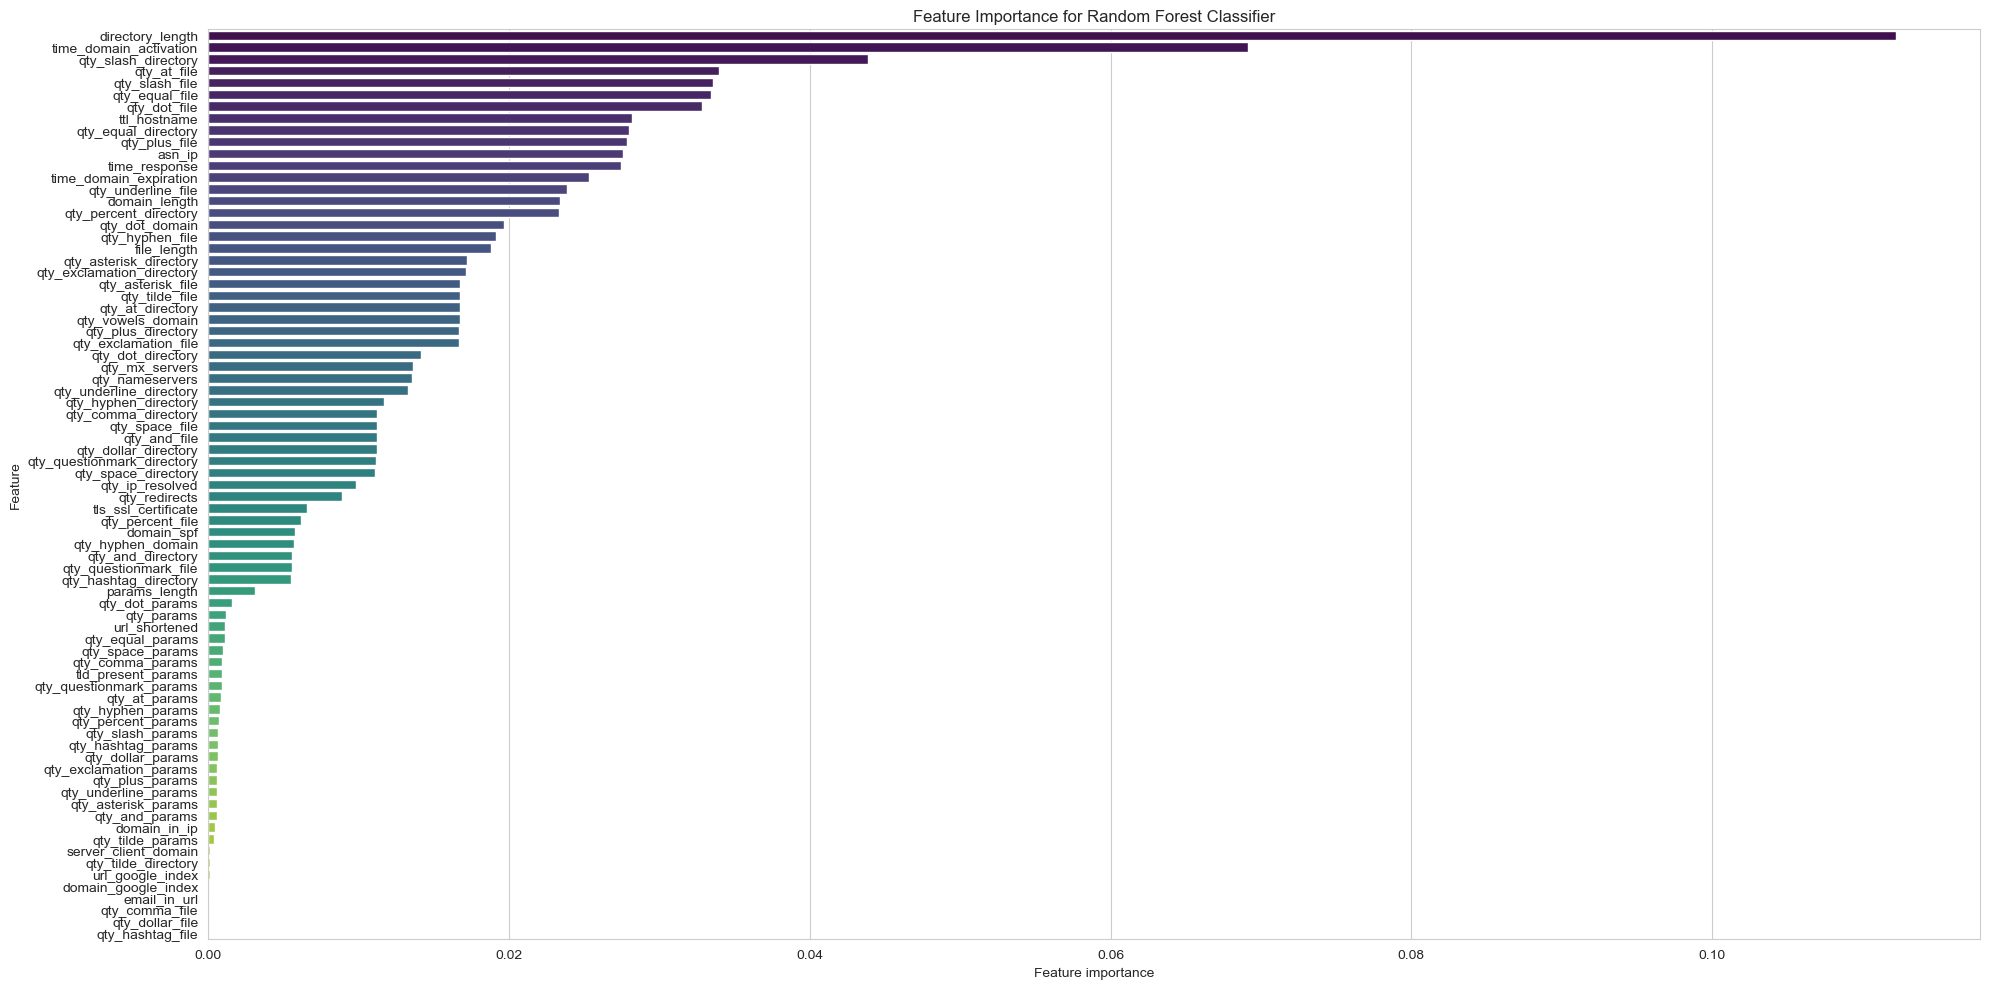

In [107]:
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sort indices by importance, descending

    plt.figure(figsize=(20, 10))
    n_features = X_train.shape[1]

    sns.barplot(y=np.array(X_cols)[indices], x=importances[indices], palette='viridis')
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title(f"Feature Importance for {best_model_name}")

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()


In [108]:
"""
Iterate over different threshold values (j), select important features based on importances, 
evaluate a RandomForestClassifier model on these features, 
and store the number of important features, F1-scores, accuracies, 
and important features for each threshold.
"""

def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')
    class_report = classification_report(predicted, true, target_names=["legitimate", "malicious"])
    return accuracy, precision, recall, f1, class_report

# Initialize lists to store results
j_values = []
num_features = []
f1_scores = []
accuracies = []
important_features_list = []

# Iterate over the range of j (0 to 0.1, inclusive, in increments of 0.001)
for j in [x * 0.001 for x in range(0, 101)]:
    important_features = []
    for i in indices:
        if importances[i] >= j:
            important_features.append(df.columns[i])
    
    # Store the number of important features
    num_features.append(len(important_features))
    
    # Check if there are features selected
    if len(important_features) == 0:
        f1_scores.append(np.nan)  # Handle case where no features are selected
        continue

    # Store the list of important features
    important_features_list.append(important_features)

    """
    Test the model with important_features generated by each j
    """

    # Prepare the data
    X = df[important_features]
    y = df['phishing']
    y = y.values.ravel()

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define and train the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_test_pred = model.predict(X_test)
    
    # Evaluate the model
    acc, _, _, f1, _ = evaluate_model(y_test, y_test_pred)
    
    # Store the F1-score
    f1_scores.append(f1)
    accuracies.append(acc)
    
    # Store the current j value
    j_values.append(j)

The maximum F1-score is 0.9719 and is achieved with 53 important features.
The most important features are: ['directory_length', 'time_domain_activation', 'qty_slash_directory', 'qty_at_file', 'qty_slash_file', 'qty_equal_file', 'qty_dot_file', 'ttl_hostname', 'qty_equal_directory', 'qty_plus_file', 'asn_ip', 'time_response', 'time_domain_expiration', 'qty_underline_file', 'domain_length', 'qty_percent_directory', 'qty_dot_domain', 'qty_hyphen_file', 'file_length', 'qty_asterisk_directory', 'qty_exclamation_directory', 'qty_asterisk_file', 'qty_tilde_file', 'qty_at_directory', 'qty_vowels_domain', 'qty_plus_directory', 'qty_exclamation_file', 'qty_dot_directory', 'qty_mx_servers', 'qty_nameservers', 'qty_underline_directory', 'qty_hyphen_directory', 'qty_comma_directory', 'qty_space_file', 'qty_and_file', 'qty_dollar_directory', 'qty_questionmark_directory', 'qty_space_directory', 'qty_ip_resolved', 'qty_redirects', 'tls_ssl_certificate', 'qty_percent_file', 'domain_spf', 'qty_hyphen_d

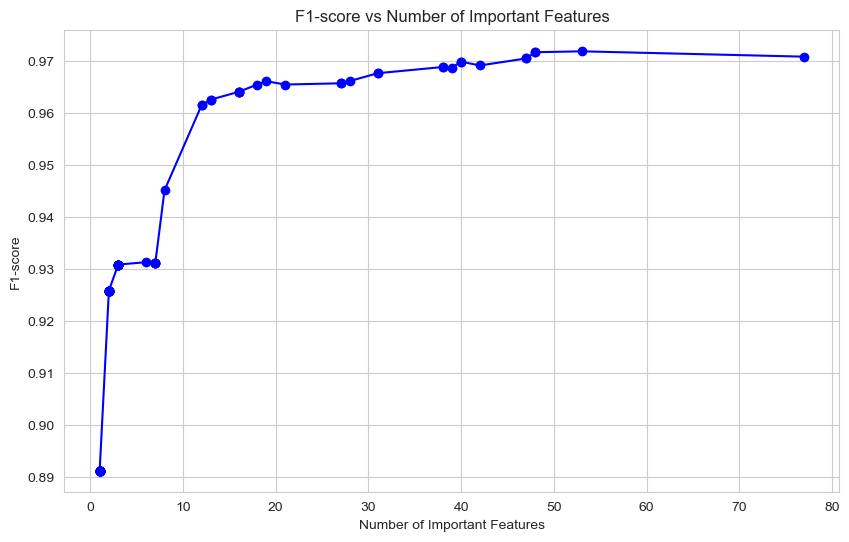



The maximum Accuracy is 0.9719 and is achieved with 53 important features.
The most important features are: ['directory_length', 'time_domain_activation', 'qty_slash_directory', 'qty_at_file', 'qty_slash_file', 'qty_equal_file', 'qty_dot_file', 'ttl_hostname', 'qty_equal_directory', 'qty_plus_file', 'asn_ip', 'time_response', 'time_domain_expiration', 'qty_underline_file', 'domain_length', 'qty_percent_directory', 'qty_dot_domain', 'qty_hyphen_file', 'file_length', 'qty_asterisk_directory', 'qty_exclamation_directory', 'qty_asterisk_file', 'qty_tilde_file', 'qty_at_directory', 'qty_vowels_domain', 'qty_plus_directory', 'qty_exclamation_file', 'qty_dot_directory', 'qty_mx_servers', 'qty_nameservers', 'qty_underline_directory', 'qty_hyphen_directory', 'qty_comma_directory', 'qty_space_file', 'qty_and_file', 'qty_dollar_directory', 'qty_questionmark_directory', 'qty_space_directory', 'qty_ip_resolved', 'qty_redirects', 'tls_ssl_certificate', 'qty_percent_file', 'domain_spf', 'qty_hyphen

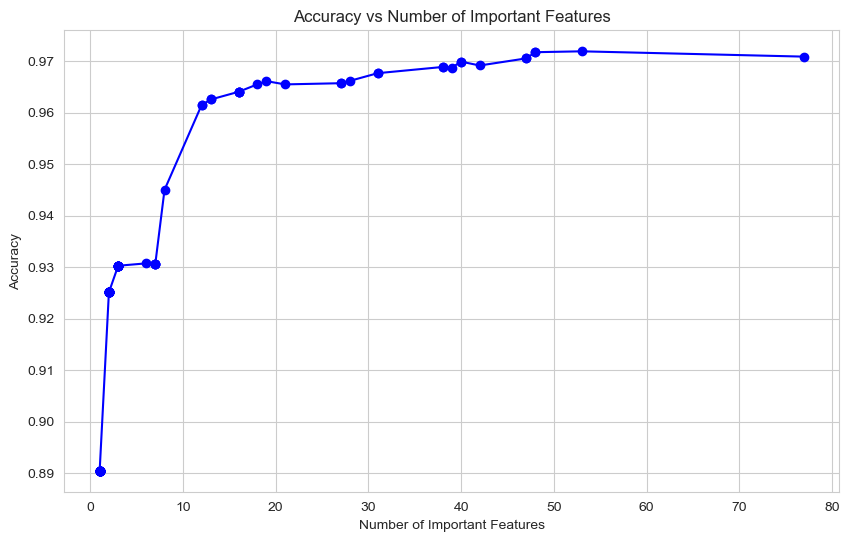

In [109]:
# Convert results to a DataFrame
results_df = pd.DataFrame({
    'j': j_values,
    'Number of Important Features': num_features,
    'F1-score': f1_scores,
    'Accuracy': accuracies,
    'Important Features': important_features_list
})

# PLOT

# F1-SCORE
# Identify the number of important features that gives the maximum F1-score
max_f1_score = results_df['F1-score'].max()
optimal_features_row = results_df.loc[results_df['F1-score'] == max_f1_score]
optimal_num_features = optimal_features_row['Number of Important Features'].values[0]
optimal_features = optimal_features_row['Important Features'].values[0]
print(f"The maximum F1-score is {max_f1_score:.4f} and is achieved with {optimal_num_features} important features.")
print(f"The most important features are: {optimal_features}")
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(num_features, f1_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Important Features')
plt.ylabel('F1-score')
plt.title('F1-score vs Number of Important Features')
plt.grid(True)
plt.show()

print("\n")

# ACCURACY
max_accuracy = results_df['Accuracy'].max()
optimal_features_row = results_df.loc[results_df['Accuracy'] == max_accuracy]
optimal_num_features = optimal_features_row['Number of Important Features'].values[0]
optimal_features = optimal_features_row['Important Features'].values[0]
print(f"The maximum Accuracy is {max_accuracy:.4f} and is achieved with {optimal_num_features} important features.")
print(f"The most important features are: {optimal_features}")
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(num_features, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Important Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Important Features')
plt.grid(True)
plt.show()


In [73]:
optimal_features

['directory_length',
 'time_domain_activation',
 'qty_slash_directory',
 'qty_at_file',
 'qty_slash_file',
 'qty_equal_file',
 'qty_dot_file',
 'ttl_hostname',
 'qty_equal_directory',
 'qty_plus_file',
 'asn_ip',
 'time_response',
 'time_domain_expiration',
 'qty_underline_file',
 'domain_length',
 'qty_percent_directory',
 'qty_dot_domain',
 'qty_hyphen_file',
 'file_length',
 'qty_asterisk_directory',
 'qty_exclamation_directory',
 'qty_asterisk_file',
 'qty_tilde_file',
 'qty_at_directory',
 'qty_vowels_domain',
 'qty_plus_directory',
 'qty_exclamation_file',
 'qty_dot_directory',
 'qty_mx_servers',
 'qty_nameservers',
 'qty_underline_directory',
 'qty_hyphen_directory',
 'qty_comma_directory',
 'qty_space_file',
 'qty_and_file',
 'qty_dollar_directory',
 'qty_questionmark_directory',
 'qty_space_directory',
 'qty_ip_resolved',
 'qty_redirects',
 'tls_ssl_certificate',
 'qty_percent_file',
 'domain_spf',
 'qty_hyphen_domain',
 'qty_and_directory',
 'qty_questionmark_file',
 'qty_has

In [74]:
results_df

,j,Number of Important Features,F1-score,Important Features
0,0.000,77,0.970907,"[directory_length, time_domain_activation, qty..."
1,0.001,53,0.971936,"[directory_length, time_domain_activation, qty..."
2,0.002,48,0.971760,"[directory_length, time_domain_activation, qty..."
3,0.003,48,0.971760,"[directory_length, time_domain_activation, qty..."
4,0.004,47,0.970563,"[directory_length, time_domain_activation, qty..."
...,...,...,...,...
96,0.096,1,0.891114,[directory_length]
97,0.097,1,0.891114,[directory_length]
98,0.098,1,0.891114,[directory_length]
99,0.099,1,0.891114,[directory_length]


In [75]:
df[optimal_features]

,directory_length,time_domain_activation,qty_slash_directory,qty_at_file,qty_slash_file,qty_equal_file,qty_dot_file,ttl_hostname,qty_equal_directory,qty_plus_file,...,qty_hyphen_domain,qty_and_directory,qty_questionmark_file,qty_hashtag_directory,params_length,qty_dot_params,qty_params,url_shortened,qty_equal_params,qty_space_params
0,8,-1,1,0,0,0,1,892,0,0,...,0,0,0,0,-1,-1,-1,0,-1,-1
1,42,579,3,0,0,0,1,9540,0,0,...,0,0,0,0,165,0,3,0,3,0
2,1,-1,1,0,0,0,0,589,0,0,...,0,0,0,0,-1,-1,-1,0,-1,-1
3,62,-1,5,0,0,0,1,292,0,0,...,0,0,0,0,-1,-1,-1,0,-1,-1
4,-1,6998,-1,-1,-1,-1,-1,3597,-1,-1,...,0,-1,-1,-1,-1,-1,-1,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87198,-1,5509,-1,-1,-1,-1,-1,3597,-1,-1,...,1,-1,-1,-1,-1,-1,-1,0,-1,-1
87199,-1,5046,-1,-1,-1,-1,-1,591,-1,-1,...,0,-1,-1,-1,-1,-1,-1,0,-1,-1
87200,48,1844,5,0,0,0,1,14391,0,0,...,0,0,0,0,-1,-1,-1,0,-1,-1
87201,1,-1,1,0,0,0,0,52,0,0,...,0,0,0,0,-1,-1,-1,0,-1,-1


In [81]:
final_data = pd.concat([df[optimal_features], df['phishing']], axis=1)
final_data

,directory_length,time_domain_activation,qty_slash_directory,qty_at_file,qty_slash_file,qty_equal_file,qty_dot_file,ttl_hostname,qty_equal_directory,qty_plus_file,...,qty_and_directory,qty_questionmark_file,qty_hashtag_directory,params_length,qty_dot_params,qty_params,url_shortened,qty_equal_params,qty_space_params,phishing
0,8,-1,1,0,0,0,1,892,0,0,...,0,0,0,-1,-1,-1,0,-1,-1,1
1,42,579,3,0,0,0,1,9540,0,0,...,0,0,0,165,0,3,0,3,0,1
2,1,-1,1,0,0,0,0,589,0,0,...,0,0,0,-1,-1,-1,0,-1,-1,0
3,62,-1,5,0,0,0,1,292,0,0,...,0,0,0,-1,-1,-1,0,-1,-1,1
4,-1,6998,-1,-1,-1,-1,-1,3597,-1,-1,...,-1,-1,-1,-1,-1,-1,0,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87198,-1,5509,-1,-1,-1,-1,-1,3597,-1,-1,...,-1,-1,-1,-1,-1,-1,0,-1,-1,0
87199,-1,5046,-1,-1,-1,-1,-1,591,-1,-1,...,-1,-1,-1,-1,-1,-1,0,-1,-1,0
87200,48,1844,5,0,0,0,1,14391,0,0,...,0,0,0,-1,-1,-1,0,-1,-1,1
87201,1,-1,1,0,0,0,0,52,0,0,...,0,0,0,-1,-1,-1,0,-1,-1,1


In [82]:
final_data.columns

Index(['directory_length', 'time_domain_activation', 'qty_slash_directory',
       'qty_at_file', 'qty_slash_file', 'qty_equal_file', 'qty_dot_file',
       'ttl_hostname', 'qty_equal_directory', 'qty_plus_file', 'asn_ip',
       'time_response', 'time_domain_expiration', 'qty_underline_file',
       'domain_length', 'qty_percent_directory', 'qty_dot_domain',
       'qty_hyphen_file', 'file_length', 'qty_asterisk_directory',
       'qty_exclamation_directory', 'qty_asterisk_file', 'qty_tilde_file',
       'qty_at_directory', 'qty_vowels_domain', 'qty_plus_directory',
       'qty_exclamation_file', 'qty_dot_directory', 'qty_mx_servers',
       'qty_nameservers', 'qty_underline_directory', 'qty_hyphen_directory',
       'qty_comma_directory', 'qty_space_file', 'qty_and_file',
       'qty_dollar_directory', 'qty_questionmark_directory',
       'qty_space_directory', 'qty_ip_resolved', 'qty_redirects',
       'tls_ssl_certificate', 'qty_percent_file', 'domain_spf',
       'qty_hyphen_domai

In [85]:
final_data.to_csv("data/final_data.csv", index=False)